**Installing Requirements:**

In [ ]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 251 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=d80c9fbc238f84120af7879b9d172e44e87c5339556436b3af3d40f736596260
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

**Importing our Dataset:**

In [ ]:
dataset = pd.read_csv('/content/ENB2012_data.csv')

In [ ]:
#getting our dataset info
dataset.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [ ]:
print (dataset.head())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [ ]:
#removing null values
dataset.isna().sum()


X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

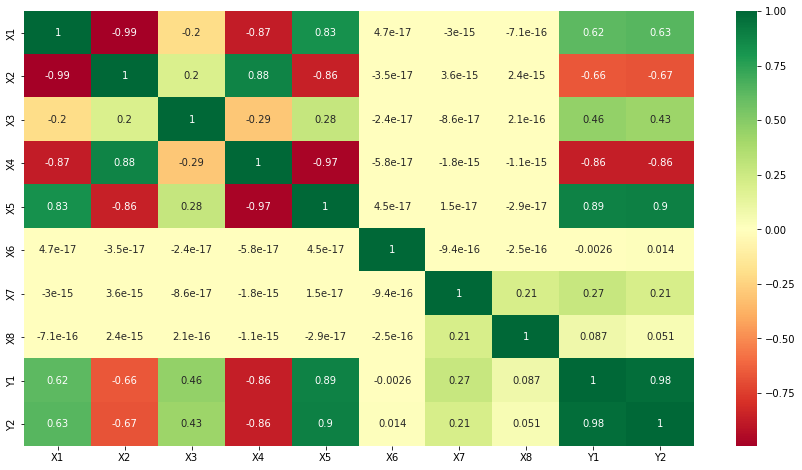

In [ ]:
#grapgical representation of our data using heatmap
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,8))
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**EDA:**

In [ ]:
chi_square_value,p_value=calculate_bartlett_sphericity(dataset)

In [ ]:
print (chi_square_value)

37779.83161964675


In [ ]:
print (p_value)

0.0


In [ ]:
kmo_all,kmo_model=calculate_kmo(dataset)

/usr/local/lib/python3.7/dist-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [ ]:
print (kmo_all)

[0.61751571 0.58530037 0.42934164 0.6099636  0.7309496  0.01700535
 0.26684872 0.56695674 0.77391974 0.8368245 ]


In [ ]:
print (kmo_model)

0.6626250526592542


In [ ]:
fa = FactorAnalyzer(42, rotation="varimax")
fa.fit(dataset)
ev, v = fa.get_eigenvalues()

In [ ]:
print (ev)

[5.22288548e+00 1.53338591e+00 1.21889416e+00 1.00017725e+00
 8.04770006e-01 1.63091786e-01 3.30828028e-02 1.93586954e-02
 4.35390369e-03 1.23165367e-15]


In [ ]:
print (v)

[ 5.21780021e+00  1.50276958e+00  7.66565231e-01  1.31768465e-01
  5.61444224e-02  4.13490435e-02  1.63179642e-02  3.99886556e-03
  4.52265955e-04 -2.77218218e-03]


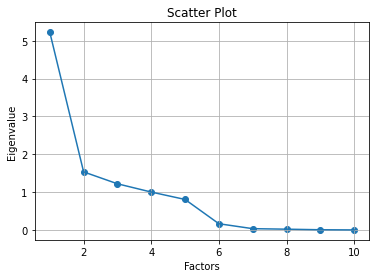

In [ ]:
plt.scatter(range(1,dataset.shape[1]+1),ev)
plt.plot(range(1,dataset.shape[1]+1),ev)
plt.title('Scatter Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

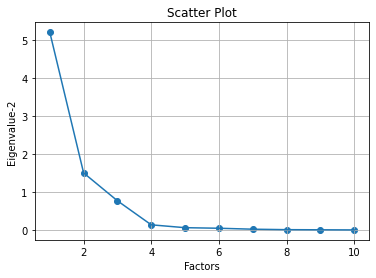

In [ ]:
plt.scatter(range(1,dataset.shape[1]+1),v)
plt.plot(range(1,dataset.shape[1]+1),v)
plt.title('Scatter Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue-2')
plt.grid()
plt.show()

In [ ]:
x = dataset.iloc[:,:-2].values
y = dataset.iloc[:,-2].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
pred_rf = reg_rf.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, pred_rf)

0.958789232467643